First importing packages and data, as well as the gaussian we'll use to fit the peaks

In [2]:
import numpy as np
from scipy.optimize import curve_fit
import scipy.signal
import scipy.stats
import matplotlib.pyplot as plt
import mplhep
import pandas as pd

na_df = pd.read_csv('22Na_high.csv', skiprows=21)
co_df = pd.read_csv('60Co_high.csv', skiprows=21)
cs_df = pd.read_csv('137Cs_high.csv', skiprows=21)
# bkg_df = pd.read_csv('bkg_high.csv', skiprows=21)

channels = na_df['Channel'].to_numpy()      # Only need this once as they're the same for each
na_counts = na_df['Counts'].to_numpy()
co_counts = co_df['Counts'].to_numpy()
cs_counts = cs_df['Counts'].to_numpy()
# bkg_counts = bkg_df['Counts'].to_numpy()

# na_counts -= bkg_counts
# co_counts -= bkg_counts
# cs_counts -= bkg_counts

na_counts = na_counts / 1200
co_counts = co_counts / 1200
cs_counts = cs_counts / 1200


def gaussian(x, mu, sigma, A):
    return (A*(1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(1/2)*((x-mu)/sigma)**2))

Now histogram each and fit curves to each section, brute force method yay. Don't forget to subtract bkg data

Optimal parameters not found: The maximum number of function evaluations is exceeded.
Fit: 1
Mu: 74.29046323516494
Sigma: 2.022878722921761
Amplitude: 4.097908000287097
Chi Squared per dof: 0.0012741208919801936

Fit: 2
Mu: 96.5680708216371
Sigma: 3.61486700688412
Amplitude: 802.0660147693036
Chi Squared per dof: 4.65656480813909

Fit: 3
Mu: 131.2793624731978
Sigma: 36.597017172822476
Amplitude: 293.2951452083591
Chi Squared per dof: 0.003102932922438842

Fit: 4
Mu: 149.47398136126174
Sigma: 32.011243670602866
Amplitude: 253.6163550001494
Chi Squared per dof: 0.0010413271920861565

Fit: 5
Mu: 176.8789486645795
Sigma: 25.819058855932862
Amplitude: 242.2841971262111
Chi Squared per dof: 0.11443185503518098

Fit: 6
Mu: 243.23558722714006
Sigma: 6.177095337896395
Amplitude: 193.80564374608602
Chi Squared per dof: 0.14622735592787436

Fit: 7
Mu: 278.04484037288904
Sigma: 28.454856968846624
Amplitude: 34.86313364108706
Chi Squared per dof: 0.00036343520106648665

Fit: 8
Mu: 347.4364131220616

/home/mkidson/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_61613/2751455544.py:29: RuntimeWarning: divide by zero encountered in double_scalars
  print(f'Fit: {p}\nMu: {popt[0]}\nSigma: {popt[1]}\nAmplitude: {popt[2]}\nChi Squared per dof: {chi_sq/dof}\n')


Optimal parameters not found: The maximum number of function evaluations is exceeded.
Fit: 1
Mu: 110.88115372392457
Sigma: 20.594320730360195
Amplitude: 287.6428418589182
Chi Squared per dof: 0.10934147069749121

Fit: 2
Mu: 158.5959422181457
Sigma: 43.11378039121093
Amplitude: 664.564589650416
Chi Squared per dof: 0.15024757987799467

Fit: 3
Mu: 223.36601168697408
Sigma: 6.805592160570942
Amplitude: 250.4070986372492
Chi Squared per dof: 2.6033109912572616

Fit: 4
Mu: 254.5489468811244
Sigma: 6.287088548024954
Amplitude: 188.08386630692948
Chi Squared per dof: 0.05745149607035041

Optimal parameters not found: The maximum number of function evaluations is exceeded.
Fit: 6
Mu: 250.48572909682036
Sigma: 164.52458024969968
Amplitude: 84.79746421984422
Chi Squared per dof: 0.00012244995146465607

Fit: 7
Mu: 301.43950812529897
Sigma: 85.61553325888374
Amplitude: 41.134008970706724
Chi Squared per dof: 0.00011231901707904699

Fit: 8
Mu: 425.2052384198594
Sigma: 18.260779879912356
Amplitude: 

/tmp/ipykernel_61613/2751455544.py:64: RuntimeWarning: divide by zero encountered in double_scalars
  print(f'Fit: {p}\nMu: {popt[0]}\nSigma: {popt[1]}\nAmplitude: {popt[2]}\nChi Squared per dof: {chi_sq/dof}\n')


Optimal parameters not found: The maximum number of function evaluations is exceeded.
Fit: 1
Mu: 85.77927137008476
Sigma: 8.4859478638576
Amplitude: 81.48722743675454
Chi Squared per dof: 0.14423860038419198

Fit: 2
Mu: 124.25943809611799
Sigma: 4.02059226719295
Amplitude: 566.0731671764819
Chi Squared per dof: 0.6602417272682024

Optimal parameters not found: The maximum number of function evaluations is exceeded.
Fit: 4
Mu: 158.00788728770337
Sigma: 47.810413900731795
Amplitude: 29.902312608909604
Chi Squared per dof: 0.00016980440379714583

Fit: 5
Mu: 204.2779228325232
Sigma: 51.77916062596142
Amplitude: 23.365145938800534
Chi Squared per dof: 0.00013544159789871386

Fit: 6
Mu: 273.63577877028473
Sigma: 22.96099539601874
Amplitude: 8.526958301480448
Chi Squared per dof: 0.0003116360488283867

Fit: 7
Mu: 327.44768280811576
Sigma: 35.226239471330175
Amplitude: 8.561135214686889
Chi Squared per dof: 8.806276590625473e-05

Fit: 8
Mu: 321.73179075577843
Sigma: 56.48882348975076
Amplitude

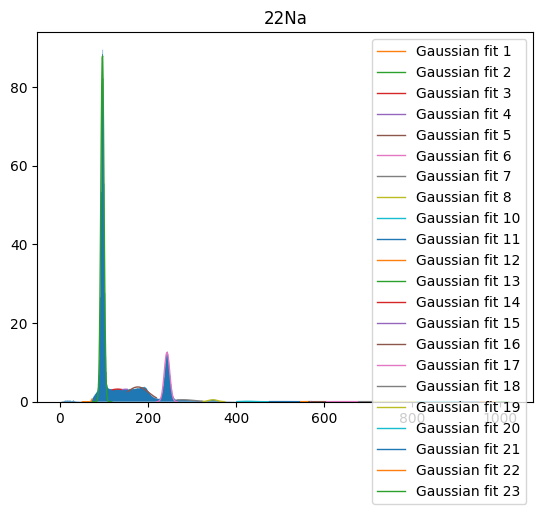

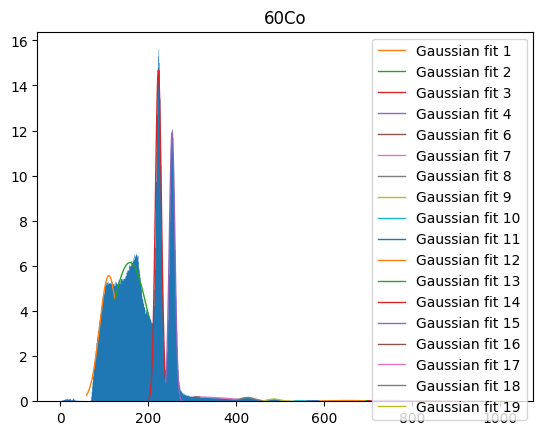

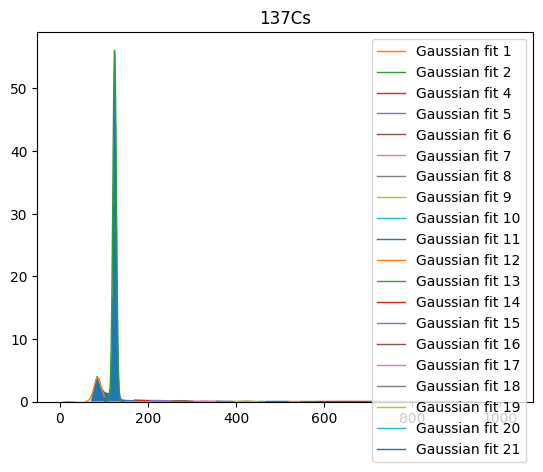

In [3]:

plt.figure()
mplhep.histplot(na_counts, histtype='fill')
plt.title('22Na')

smoothData = scipy.signal.savgol_filter(na_counts, 51, 5)
smootherData = scipy.signal.savgol_filter(smoothData, 51, 5)
# Finds the minima
minima=scipy.signal.find_peaks(smootherData*-1)[0]

for p in range(len(minima)-1):
    try:
        # Isolates the regions of interest 
        xFit=channels[minima[p]:minima[p+1]]
        yFit=na_counts[minima[p]:minima[p+1]]
        # Need a new N for each region since the size is changing
        newN=len(xFit)
        # Approximates the median to be in the middle of the two endpoint, it's a reasonable guess
        approxCentroid=(minima[p]+minima[p+1])/2
        p0=[approxCentroid,50,1]
        numParams=len(p0)

        popt, pcov = curve_fit(gaussian, xFit, yFit, p0, method='trf')
        # Finding if the fit was poggers or cringe
        toPlot=gaussian(xFit, *popt)
        chi_sq=sum((yFit-toPlot)**2)
        dof = newN-numParams

        # if p==7:
        print(f'Fit: {p}\nMu: {popt[0]}\nSigma: {popt[1]}\nAmplitude: {popt[2]}\nChi Squared per dof: {chi_sq/dof}\n')
        plt.plot(xFit, toPlot, linewidth=1, label=f'Gaussian fit {p}')
    except RuntimeError as identifier:
        print(identifier)
plt.legend(loc='upper right')

print('---------------------------------------')
plt.figure()
mplhep.histplot(co_counts, histtype='fill')
plt.title('60Co')

smoothData = scipy.signal.savgol_filter(co_counts, 51, 5)
smootherData = scipy.signal.savgol_filter(smoothData, 51, 5)
# Finds the minima
minima=scipy.signal.find_peaks(smootherData*-1)[0]

for p in range(len(minima)-1):
    try:
        # Isolates the regions of interest 
        xFit=channels[minima[p]:minima[p+1]]
        yFit=co_counts[minima[p]:minima[p+1]]
        # Need a new N for each region since the size is changing
        newN=len(xFit)
        # Approximates the median to be in the middle of the two endpoint, it's a reasonable guess
        approxCentroid=(minima[p]+minima[p+1])/2
        p0=[approxCentroid,50,1]
        numParams=len(p0)

        popt, pcov = curve_fit(gaussian, xFit, yFit, p0, method='trf')
        # Finding if the fit was poggers or cringe
        toPlot=gaussian(xFit, *popt)
        chi_sq=sum((yFit-toPlot)**2)
        dof = newN-numParams

        # if p==7:
        print(f'Fit: {p}\nMu: {popt[0]}\nSigma: {popt[1]}\nAmplitude: {popt[2]}\nChi Squared per dof: {chi_sq/dof}\n')
        plt.plot(xFit, toPlot, linewidth=1, label=f'Gaussian fit {p}')
    except RuntimeError as identifier:
        print(identifier)
plt.legend(loc='upper right')

plt.figure()
mplhep.histplot(cs_counts, histtype='fill')
plt.title('137Cs')

smoothData = scipy.signal.savgol_filter(cs_counts, 51, 5)
smootherData = scipy.signal.savgol_filter(smoothData, 51, 5)
# Finds the minima
minima=scipy.signal.find_peaks(smootherData*-1)[0]

for p in range(len(minima)-1):
    try:
        # Isolates the regions of interest 
        xFit=channels[minima[p]:minima[p+1]]
        yFit=cs_counts[minima[p]:minima[p+1]]
        # Need a new N for each region since the size is changing
        newN=len(xFit)
        # Approximates the median to be in the middle of the two endpoint, it's a reasonable guess
        approxCentroid=(minima[p]+minima[p+1])/2
        p0=[approxCentroid,50,1]
        numParams=len(p0)

        popt, pcov = curve_fit(gaussian, xFit, yFit, p0, method='trf')
        # Finding if the fit was poggers or cringe
        toPlot=gaussian(xFit, *popt)
        chi_sq=sum((yFit-toPlot)**2)
        dof = newN-numParams

        # if p==7:
        print(f'Fit: {p}\nMu: {popt[0]}\nSigma: {popt[1]}\nAmplitude: {popt[2]}\nChi Squared per dof: {chi_sq/dof}\n')
        plt.plot(xFit, toPlot, linewidth=1, label=f'Gaussian fit {p}')
    except RuntimeError as identifier:
        print(identifier)
plt.legend(loc='upper right')





Na:

Fit: 2
Mu: 96.5680708216371
Sigma: 3.61486700688412
Amplitude: 802.0660147693036
Chi Squared per dof: 4.65656480813909

Fit: 6
Mu: 243.23558722714006
Sigma: 6.177095337896395
Amplitude: 193.80564374608602
Chi Squared per dof: 0.14622735592787436

Co: 

Fit: 3
Mu: 223.36601168697408
Sigma: 6.805592160570942
Amplitude: 250.4070986372492
Chi Squared per dof: 2.6033109912572616

Fit: 4
Mu: 254.5489468811244
Sigma: 6.287088548024954
Amplitude: 188.08386630692948
Chi Squared per dof: 0.05745149607035041

Cs:

Fit: 2
Mu: 124.25943809611799
Sigma: 4.02059226719295
Amplitude: 566.0731671764819
Chi Squared per dof: 0.6602417272682024



Now the calibration by fitting a straight line

In [5]:
mus = np.array([96.5680708216371, 243.23558722714006, 223.36601168697408, 254.5489468811244, 124.25943809611799])        # 22Na, 22Na, 60Co, 60Co, 137Cs
sigmas = np.array([3.61486700688412, 6.177095337896395, 6.805592160570942, 6.287088548024954, 4.02059226719295])

energies = np.array([511, 1274.537, 1173.228, 1332.492, 661.657])

def linear(x, m, c):
    return m*x+c

popt, pcov = curve_fit(linear, energies, mus, [1,1], sigma=sigmas, absolute_sigma=True)
stDev = np.sqrt(np.diag(pcov))

print(popt)
print(f'Energy of last bin: {(1024 - popt[1]) / popt[0]}')

[ 0.19255936 -2.35811083]
Energy of last bin: 5330.086800913051


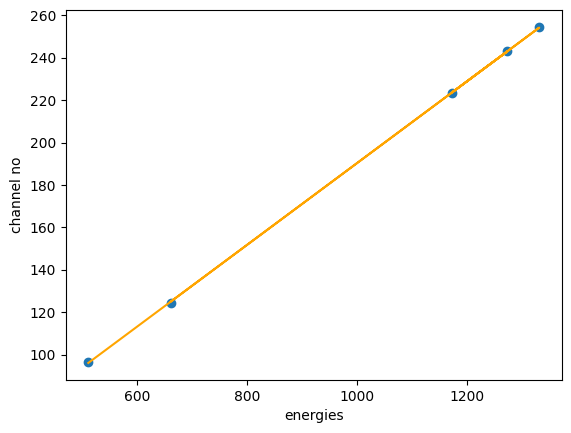

In [6]:
plt.figure()
plt.scatter(energies, mus)
plt.xlabel('energies')
plt.ylabel('channel no')
plt.plot(energies, popt[0]*energies + popt[1], color='orange')


# OLD

Na:

Fit: 4
Mu: 424.59868872909885
Sigma: 15.650131796914554
Amplitude: 1016.7647321648595
Chi Squared per dof: 0.28844287643454425

Fit: 9
Mu: 1067.1586358966501
Sigma: 26.44195750947263
Amplitude: 193.51717382635908
Chi Squared per dof: 0.0036498211946992837

Co: 

Fit: 16
Mu: 1182.9882482058288
Sigma: 34.50609619350838
Amplitude: 240.99334225052445
Chi Squared per dof: 0.01727381795956373

Fit: 17
Mu: 1348.736641695972
Sigma: 33.32327369111586
Amplitude: 185.35976906295707
Chi Squared per dof: 0.0017676088287124153

Cs:

Fit: 8
Mu: 551.9180869716616
Sigma: 17.414644025270015
Amplitude: 559.0753421628693
Chi Squared per dof: 0.009141879002877

